# MNIST handwritten digit recognition using a simple CNN

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_test_copy = X_test.copy()
print(type(X_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

<class 'numpy.ndarray'>
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


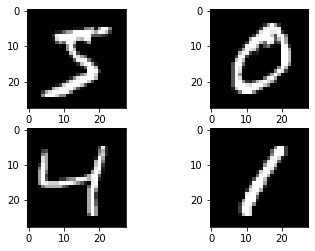

In [3]:
# plot 4 images as gray scale
plt.subplot(2,2,1)
plt.imshow(X_train[0], 'gray')
plt.subplot(2,2,2)
plt.imshow(X_train[1], 'gray')
plt.subplot(2,2,3)
plt.imshow(X_train[2], 'gray')
plt.subplot(2,2,4)
plt.imshow(X_train[3], 'gray')
# show the plot
plt.show()

In [4]:
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

# In Keras, the layers used for two-dimensional convolutions expect pixel values with the dimensions:
# [pixels][width][height][channels].

In [5]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

Convolutional neural networks are more complex than standard multi-layer perceptrons, so we will start by using a simple structure to begin with that uses all of the elements for state of the art results. Below summarizes the network architecture.

1. The first hidden layer is a convolutional layer called a Convolution2D. The layer has 32 feature maps, which with the size of 5×5 and a rectifier activation function. This is the input layer, expecting images with the structure outline above [pixels][width][height].  
2. Next we define a pooling layer that takes the max called MaxPooling2D. It is configured with a pool size of 2×2.
3. The next layer is a regularization layer using dropout called Dropout. It is configured to randomly exclude 20% of neurons in the layer in order to reduce overfitting.
4. Next is a layer that converts the 2D matrix data to a vector called Flatten. It allows the output to be processed by standard fully connected layers.
5. Next a fully connected layer with 128 neurons and rectifier activation function.
6. Finally, the output layer has 10 neurons for the 10 classes and a softmax activation function to output probability-like predictions for each class.

In [6]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [7]:
# build the model
model = baseline_model()
# Fit the model
# The CNN is fit over 10 epochs with a batch size of 200.
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=1)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 34s 566us/step - loss: 0.2527 - accuracy: 0.9268 - val_loss: 0.0768 - val_accuracy: 0.9768
Epoch 2/10
60000/60000 [==============================] - 31s 519us/step - loss: 0.0753 - accuracy: 0.9779 - val_loss: 0.0574 - val_accuracy: 0.9818
Epoch 3/10
60000/60000 [==============================] - 32s 538us/step - loss: 0.0525 - accuracy: 0.9844 - val_loss: 0.0406 - val_accuracy: 0.9868
Epoch 4/10
60000/60000 [==============================] - 33s 543us/step - loss: 0.0415 - accuracy: 0.9873 - val_loss: 0.0376 - val_accuracy: 0.9873
Epoch 5/10
60000/60000 [==============================] - 32s 539us/step - loss: 0.0334 - accuracy: 0.9895 - val_loss: 0.0320 - val_accuracy: 0.9897
Epoch 6/10
60000/60000 [==============================] - 32s 535us/step - loss: 0.0285 - accuracy: 0.9907 - val_loss: 0.0308 - val_accuracy: 0.9902
Epoch 7/10
60000/60000 [==============================] 

In [15]:
history_dict = history.history
print(history_dict.keys())

# This dict can be used to plot the losses and accuracies

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


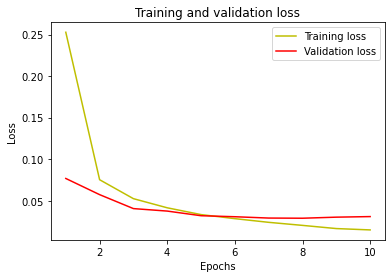

In [12]:
# Plotting the loss during training and validation

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

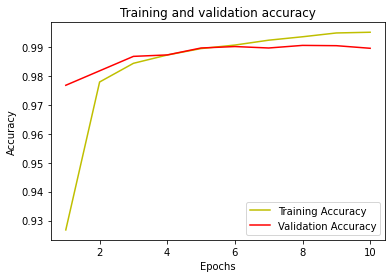

In [16]:
# Plotting the accuracy during training and validation

accu = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, accu, 'y', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()